# **Tentang Dataset**
Dataset "Stunting Toddler (Balita) Detection" ini kumpulan data berdasarkan rumus z-score penentuan stunting menurut WHO (World Health Organization), yang berfokus pada deteksi stunting pada balita (bayi dibawah lima tahun). Dataset ini terdiri dari 121.000 baris data, yang merinci informasi mengenai umur, jenis kelamin, tinggi badan, dan status gizi balita. Dataset ini bertujuan untuk membantu peneliti, ahli gizi, dan pembuat kebijakan dalam memahami dan mengatasi masalah stunting pada anak-anak di bawah lima tahun.

**Rincian Kolom Dataset:**

- **Umur (Bulan)**: Mengindikasikan usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat. **(Umur 0 sampai 60 bulan)**

- **Jenis Kelamin**: Terdapat dua kategori dalam kolom ini, 'laki-laki' (male) dan 'perempuan' (female). Jenis kelamin merupakan faktor penting dalam analisis pola pertumbuhan dan risiko stunting.

- **Tinggi Badan**: Dicatat dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita. Data ini memungkinkan peneliti untuk menentukan apakah pertumbuhan anak sesuai dengan standar usianya.

- **Status Gizi**: Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD). Kategori ini membantu dalam identifikasi cepat dan intervensi bagi anak-anak yang berisiko atau mengalami masalah pertumbuhan.

# **Import Library**

In [ ]:
from google.colab import userdata
import os
import random
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/agummds/Predictive-Analytics/master/Dataset/data_balita.csv'

df = pd.read_csv(url)
df.head(20)

Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0              0     laki-laki          44.591973           stunted
1              0     laki-laki          56.705203            tinggi
2              0     laki-laki          46.863358            normal
3              0     laki-laki          47.508026            normal
4              0     laki-laki          42.743494  severely stunted
5              0     laki-laki          44.257719           stunted
6              0     laki-laki          59.572523            tinggi
7              0     laki-laki          42.701796  severely stunted
8              0     laki-laki          45.251779           stunted
9              0     laki-laki          57.201961            tinggi
10             0     laki-laki          51.353858            normal
11             0     laki-laki          53.049911            normal
12             0     laki-laki          43.544872  severely stunted
13             0     laki-laki          46.252632            normal
14             0     laki-laki          43.676035  severely stunted
15             0     laki-laki          52.639705            normal
16             0     laki-laki          46.886997            normal
17             0     laki-laki          57.422319            tinggi
18             0     laki-laki          49.748324            normal
19             0     laki-laki          42.018108  severely stunted

In [ ]:
df.tail()

Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status Gizi
120994            60     perempuan              100.6      normal
120995            60     perempuan               98.3     stunted
120996            60     perempuan              121.3      normal
120997            60     perempuan              112.2      normal
120998            60     perempuan              109.8      normal

# **Exploratory Data Analysis (EDA)**

## a. Cek struktur dan informasi awal data

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000

## b. Distribusi Status Gizi

<Axes: xlabel='Status Gizi', ylabel='count'>

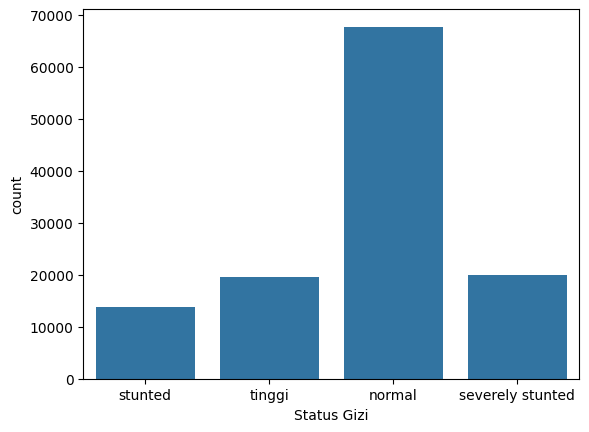

In [ ]:
sns.countplot(data=df, x='Status Gizi')

## c. Distribusi Umur dan Tinggi Badan

<Axes: xlabel='Umur (bulan)', ylabel='Count'>

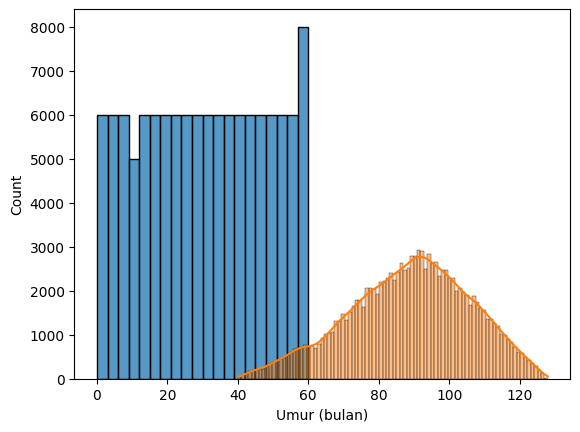

In [ ]:
sns.histplot(df['Umur (bulan)'], bins=20)
sns.histplot(df['Tinggi Badan (cm)'], kde=True)

## d. Cek rata-rata tinggi & umur per kategori status gizi.

In [ ]:
df.groupby('Status Gizi')[['Umur (bulan)', 'Tinggi Badan (cm)']].describe()

Umur (bulan)                                               \
                        count       mean        std  min   25%   50%   75%   
Status Gizi                                                                  
normal                67755.0  32.607601  17.007331  0.0  19.0  34.0  47.0   
severely stunted      19869.0  26.290956  17.582342  0.0  11.0  24.0  41.0   
stunted               13815.0  32.763807  17.062236  0.0  19.0  34.0  48.0   
tinggi                19560.0  23.858129  17.572063  0.0   8.0  21.0  37.0   

                       Tinggi Badan (cm)                                   \
                   max             count       mean        std        min   
Status Gizi                                                                 
normal            60.0           67755.0  92.702689  15.676267  45.433571   
severely stunted  60.0           19869.0  73.176224  13.645497  40.010437   
stunted           60.0           13815.0  82.208722  12.436462  43.623654   
tinggi            60.0           19560.0  94.912898  18.259081  54.716373   

                                              
                     25%   50%    75%    max  
Status Gizi                                   
normal            82.800  94.9  104.2  123.9  
severely stunted  63.200  75.1   84.6   95.9  
stunted           74.900  84.9   92.1  100.7  
tinggi            79.975  96.0  110.0  128.0

## h.  Encode kolom kategorikal dan cek korelasi

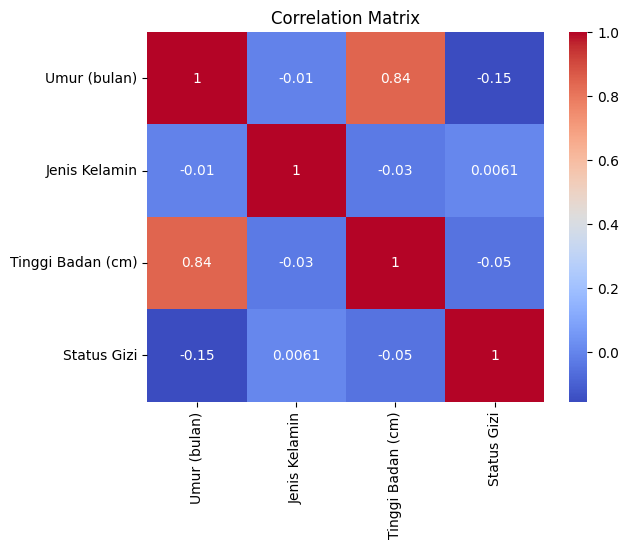

In [ ]:
df_encoded = df.copy()
le_gender = LabelEncoder()
le_status = LabelEncoder()

df_encoded['Jenis Kelamin'] = le_gender.fit_transform(df_encoded['Jenis Kelamin'])
df_encoded['Status Gizi'] = le_status.fit_transform(df_encoded['Status Gizi'])

# Sekarang bisa cek korelasi
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Univariate Analysis**

## 1. Umur (bulan) — numerik

Text(0.5, 1.0, 'Distribusi Umur')

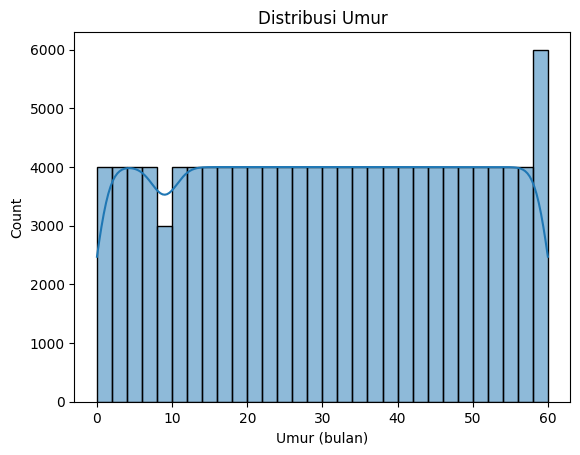

In [ ]:
sns.histplot(df['Umur (bulan)'], bins=30, kde=True)
plt.title('Distribusi Umur')

## 2. Tinggi Badan (cm) — numerik

Text(0.5, 1.0, 'Boxplot Tinggi Badan')

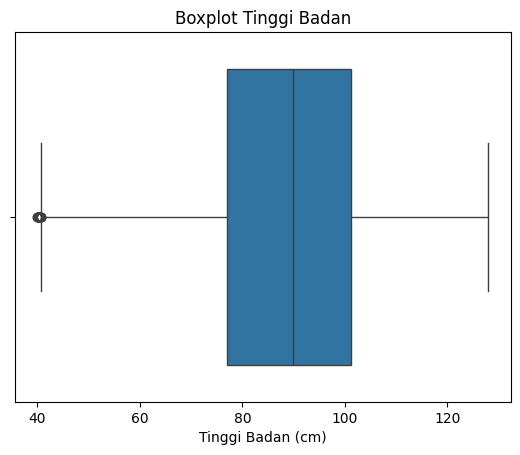

In [ ]:
sns.boxplot(x=df['Tinggi Badan (cm)'])
plt.title('Boxplot Tinggi Badan')

## 3. Jenis Kelamin — kategorikal

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

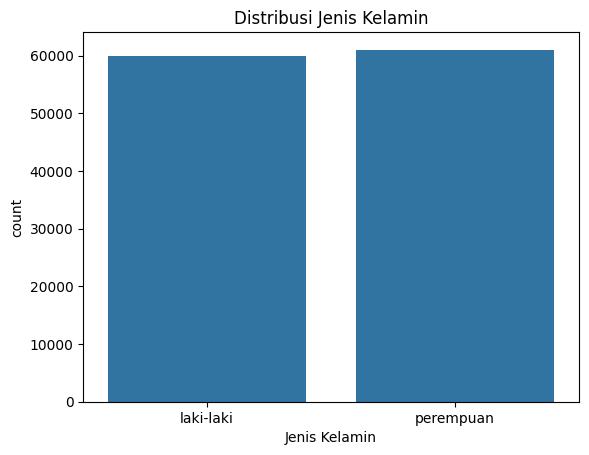

In [ ]:
sns.countplot(x='Jenis Kelamin', data=df)
plt.title('Distribusi Jenis Kelamin')

# Multivariate Analysis EDA

## 1. Umur vs Tinggi Badan (scatter plot)

Text(0.5, 1.0, 'Umur vs Tinggi Badan per Status Gizi')

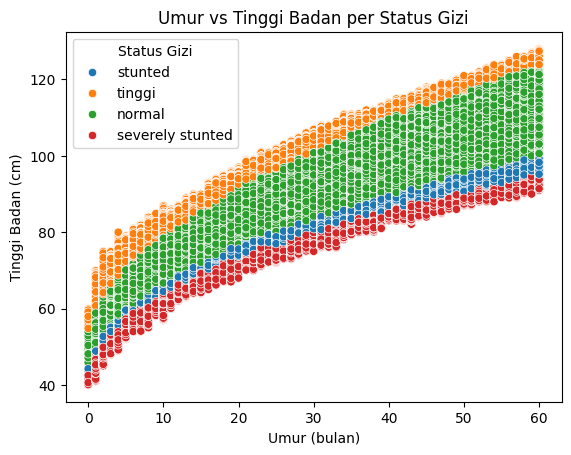

In [ ]:
sns.scatterplot(data=df, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi')
plt.title('Umur vs Tinggi Badan per Status Gizi')

## 2. Jenis Kelamin vs Status Gizi (countplot with hue)

Text(0.5, 1.0, 'Distribusi Status Gizi per Jenis Kelamin')

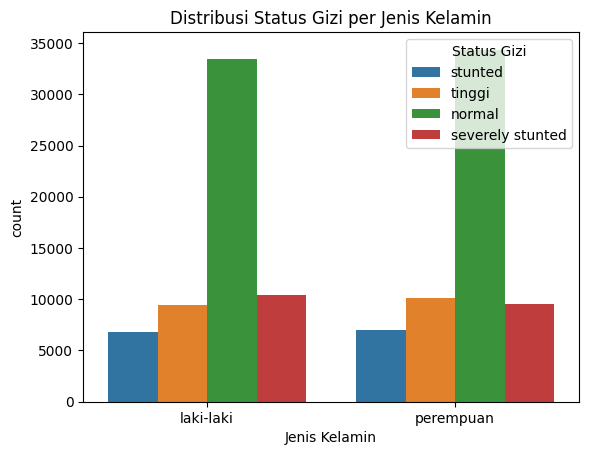

In [ ]:
sns.countplot(data=df, x='Jenis Kelamin', hue='Status Gizi')
plt.title('Distribusi Status Gizi per Jenis Kelamin')

## 3. Boxplot Tinggi Badan berdasarkan Status Gizi

Text(0.5, 1.0, 'Tinggi Badan per Kategori Status Gizi')

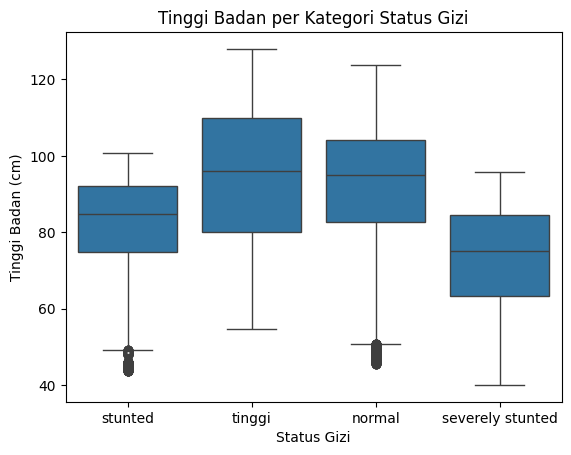

In [ ]:
sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)')
plt.title('Tinggi Badan per Kategori Status Gizi')

## 4. Pairplot (semua kombinasi numerik)

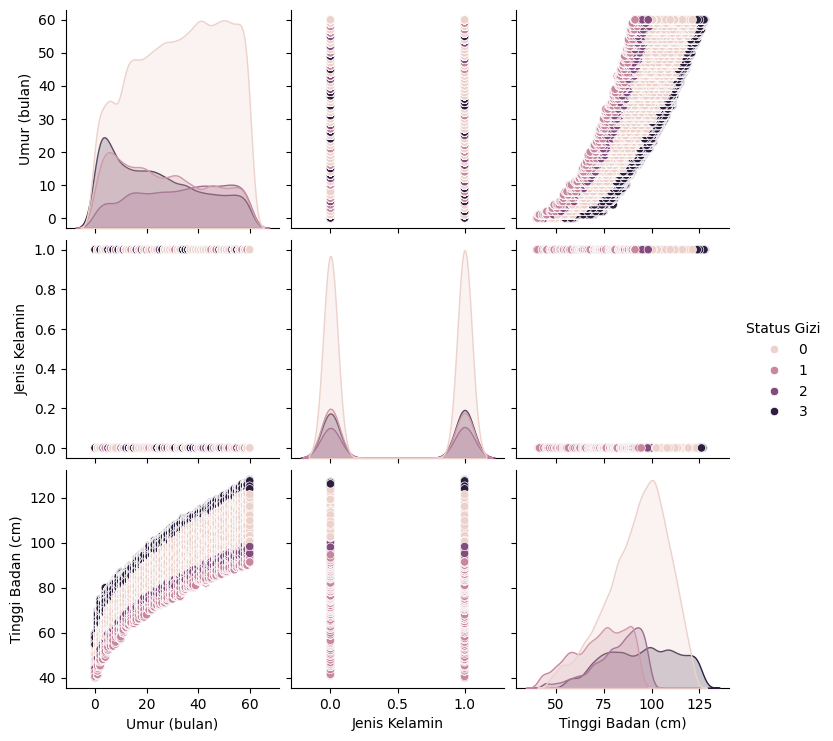

In [ ]:
df_encoded = df.copy()
df_encoded['Jenis Kelamin'] = LabelEncoder().fit_transform(df_encoded['Jenis Kelamin'])
df_encoded['Status Gizi'] = LabelEncoder().fit_transform(df_encoded['Status Gizi'])

sns.pairplot(df_encoded, hue='Status Gizi')

# Model Persiapan

In [ ]:
df_encoded.head()

Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             0              0          44.591973            2
1             0              0          56.705203            3
2             0              0          46.863358            0
3             0              0          47.508026            0
4             0              0          42.743494            1

In [ ]:
df_encoded.tail()

Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
120994            60              1              100.6            0
120995            60              1               98.3            2
120996            60              1              121.3            0
120997            60              1              112.2            0
120998            60              1              109.8            0

## Pembagian Dataset

In [ ]:
X = df[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = df['Status Gizi']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##  Model Training dan Evaluasi

## a. Decision Tree Classifier

In [ ]:
# Create a LabelEncoder object
le_gender = LabelEncoder()

# Encode fitur 'Jenis Kelamin'
X_train['Jenis Kelamin'] = le_gender.fit_transform(X_train['Jenis Kelamin'])
X_test['Jenis Kelamin'] = le_gender.transform(X_test['Jenis Kelamin'])

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Decode y_test ke label string
y_test_labels = le_status.inverse_transform(y_test)

# Evaluation
print("Decision Tree Classifier:")
print(classification_report(y_test_labels, y_pred_dt))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13551
           1       1.00      1.00      1.00      3974
           2       1.00      1.00      1.00      2763
           3       1.00      1.00      1.00      3912

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



## b. Random Forest Classifier

In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Decode y_test ke label string
y_test_labels = le_status.inverse_transform(y_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test_labels, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13551
           1       1.00      1.00      1.00      3974
           2       1.00      1.00      1.00      2763
           3       1.00      1.00      1.00      3912

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



## c. XGBoost Classifier

In [ ]:
# Create a LabelEncoder for the 'Status Gizi' column
le_status = LabelEncoder()

# Apply Label Encoding to the 'Status Gizi' column in the original DataFrame before splitting
df['Status Gizi'] = le_status.fit_transform(df['Status Gizi'])

# Create a LabelEncoder object for 'Jenis Kelamin'
le_gender = LabelEncoder()

# Fit the encoder on the training data and transform both train and test data
X_train['Jenis Kelamin'] = le_gender.fit_transform(X_train['Jenis Kelamin'])
X_test['Jenis Kelamin'] = le_gender.transform(X_test['Jenis Kelamin'])

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13551
           1       0.99      0.99      0.99      3974
           2       0.97      0.97      0.97      2763
           3       0.99      1.00      0.99      3912

    accuracy                           0.99     24200
   macro avg       0.99      0.99      0.99     24200
weighted avg       0.99      0.99      0.99     24200



In [ ]:
print("Prediksi Decision Tree:")
print(np.unique(y_pred_dt, return_counts=True))

print("Prediksi Random Forest:")
print(np.unique(y_pred_rf, return_counts=True))


Prediksi Decision Tree:
(array(['normal', 'severely stunted', 'stunted', 'tinggi'], dtype=object), array([13555,  3980,  2755,  3910]))
Prediksi Random Forest:
(array(['normal', 'severely stunted', 'stunted', 'tinggi'], dtype=object), array([13556,  3978,  2758,  3908]))


# Evaluasi Model: Penerapan Metrik Kinerja & Visualisasi Model

 ## Langkah 1: Evaluasi dengan Metrik Kinerja

<ipython-input-41-a8d13ffb9dd0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')


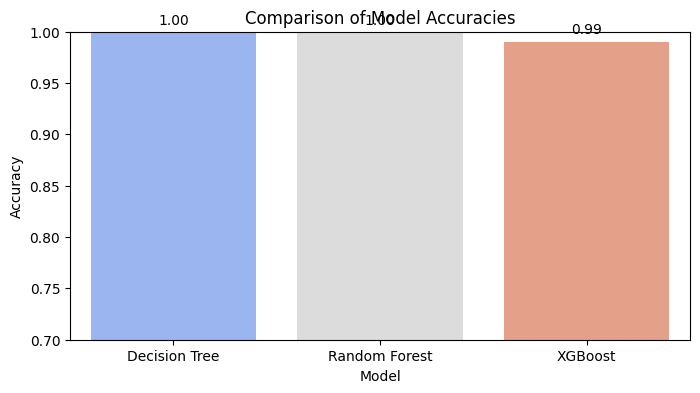

In [ ]:
# Mengumpulkan akurasi dari setiap model
# Create a dictionary to store the models and their predictions
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Get predictions for each model
predictions = {name: model.predict(X_test) for name, model in models.items()}

# Calculate accuracies
accuracies = [accuracy_score(y_test, predictions[name]) for name in models]
model_names = list(models.keys())

# Membuat DataFrame untuk akurasi model
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Visualisasi akurasi menggunakan seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='coolwarm')
ax.set_ylim(0.7, 1.0)  # Set limit y-axis untuk memudahkan perbandingan
ax.set_title('Comparison of Model Accuracies')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')

# Menambahkan teks akurasi pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [ ]:
print(accuracy_df)

           Model  Accuracy
0  Decision Tree  0.999174
1  Random Forest  0.999215
2        XGBoost  0.990455


## Langkah 2: Visualisasi Akurasi Model

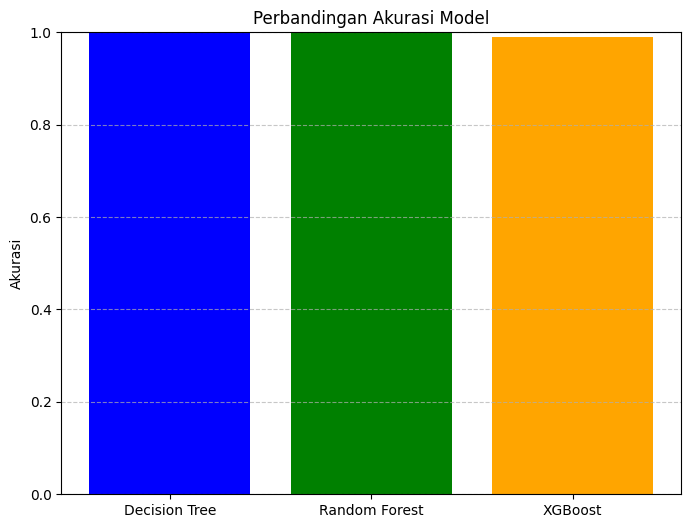

In [ ]:
# Plot akurasi model
plt.figure(figsize=(8, 6))
# Replace model_scores with accuracy_df
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'green', 'orange'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: >

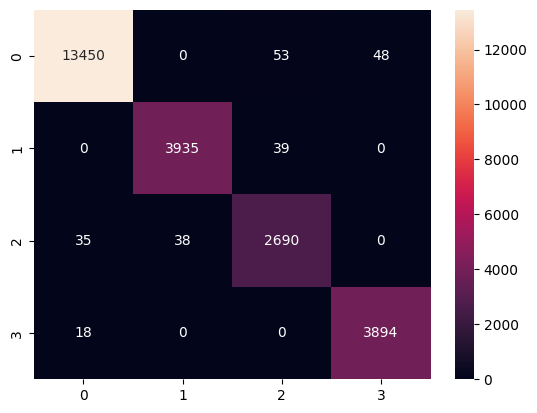

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_labels, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d')